In [2]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
os.getcwdb()

b'C:\\Users\\Phuoc Hoang\\Loan Prediction'

In [13]:
test = pd.read_csv('test_lAUu6dG.csv')
train = pd.read_csv('train_ctrUa4K.csv')

In [14]:
# Make copy to preserve the originals
test_ori = test.copy()
train_ori = train.copy()

In [15]:
train.shape

(614, 13)

In [16]:
test.shape

(367, 12)

In [17]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [19]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

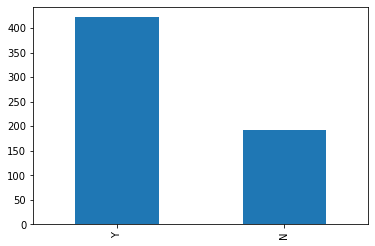

In [21]:
# Loan Status into bar chart
train['Loan_Status'].value_counts().plot(kind = 'bar')

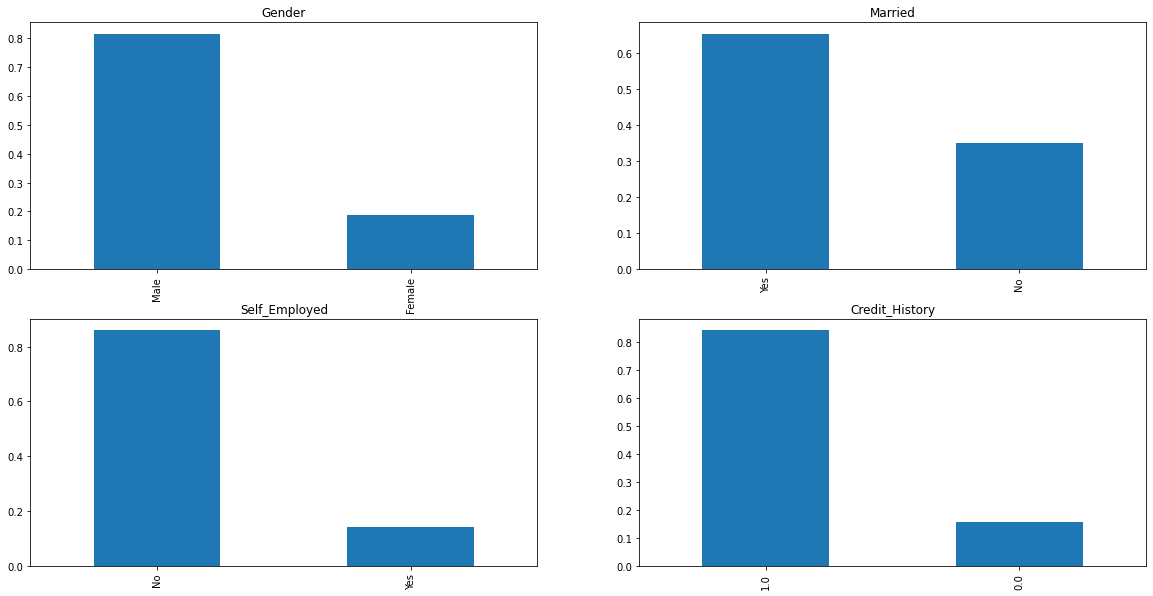

In [23]:
# Independent Variable (Categorical)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

<AxesSubplot:xlabel='Gender'>

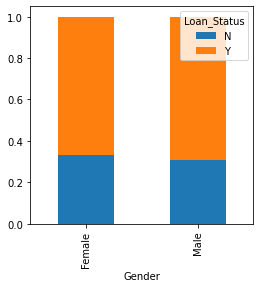

In [55]:
# Stacked Bar Plot: Proportion of approved/ unapproved Loan
Gender=pd.crosstab(data_train['Gender'],data_train['Loan_Status'])
# sum(1) is sum all axis 1 or columns, row is gender total; axis =0 div by row, row represent F or M so div gender.sum or col sum is reasonable?
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

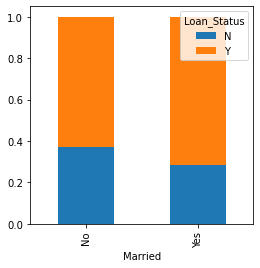

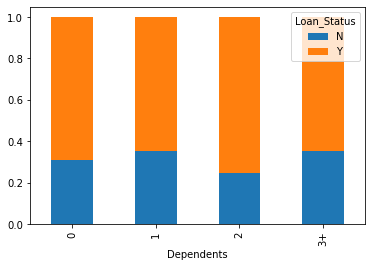

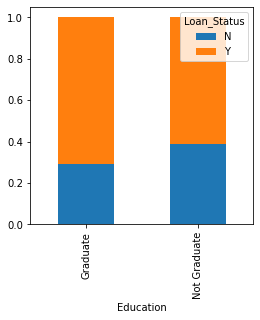

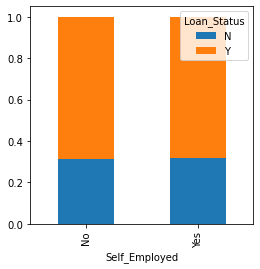

In [23]:
Married=pd.crosstab(data_train['Married'],data_train['Loan_Status'])
Dependents=pd.crosstab(data_train['Dependents'],data_train['Loan_Status'])
Education=pd.crosstab(data_train['Education'],data_train['Loan_Status'])
Self_Employed=pd.crosstab(data_train['Self_Employed'],data_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

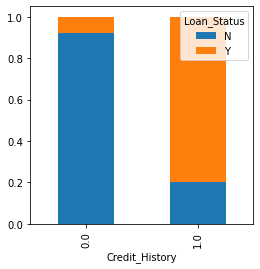

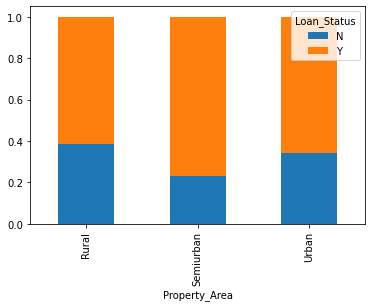

In [57]:
Credit_History=pd.crosstab(data_train['Credit_History'],data_train['Loan_Status'])
Property_Area=pd.crosstab(data_train['Property_Area'],data_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

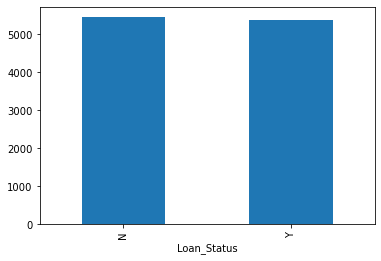

In [59]:
data_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

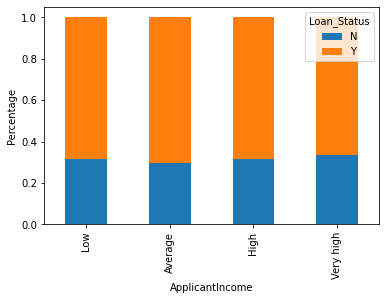

In [61]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
data_train['Income_bin']=pd.cut(data_train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(data_train['Income_bin'],data_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

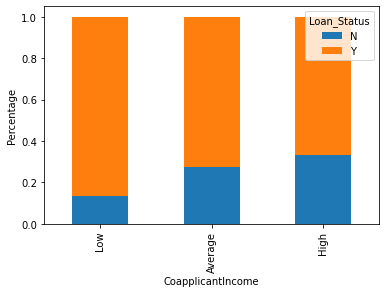

In [63]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
data_train['Coapplicant_Income_bin']=pd.cut(data_train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(data_train['Coapplicant_Income_bin'],data_train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

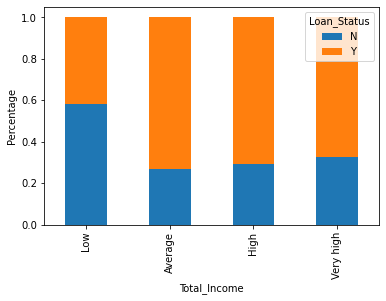

In [64]:
data_train['Total_Income']=data_train['ApplicantIncome']+data_train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
data_train['Total_Income_bin']=pd.cut(data_train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data_train['Total_Income_bin'],data_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

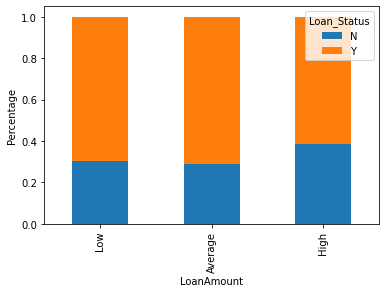

In [66]:
bins=[0,100,200,700]
group=['Low','Average','High']
data_train['LoanAmount_bin']=pd.cut(data_train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(data_train['LoanAmount_bin'],data_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [67]:
data_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

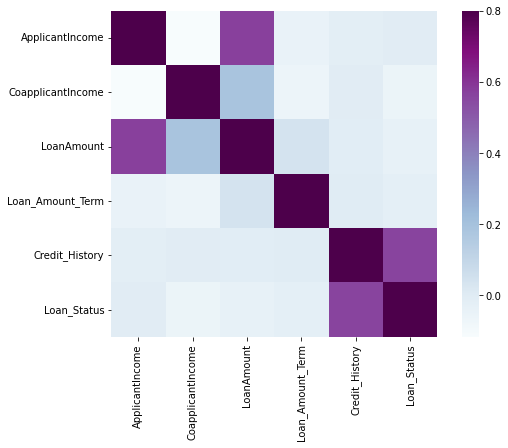

In [71]:
# Numberic Conversion & heat map
data_train=data_train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
data_train['Dependents'].replace('3+', 3,inplace=True)
data_test['Dependents'].replace('3+', 3,inplace=True)
data_train['Loan_Status'].replace('N', 0,inplace=True)
data_train['Loan_Status'].replace('Y', 1,inplace=True)

matrix = data_train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");